<a href="https://colab.research.google.com/github/irvandandung/penelitian-rekomendasi-pinjaman-merchant/blob/master/Penelitian_Rekomendasi_Pinjaman_Merchant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

##Import Module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import urllib.request
import json
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

##Read File Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/merchant.csv')
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessName,acqBusinessCity,acqBusinessProvince,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,Ayam Geprek Papiluk,Wil. Jakarta Timur,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
1,15,60666.666667,910000,6370.00,903630.00,Aldien Kitchen,Depok,Jawa Barat,FOOD AND DRINK,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,Apotek Indobat Ground Zero,Badung,Bali,HEALTH AND BEAUTY,UKE,False
3,302,18854.304636,5694000,315.00,5693685.00,Kedai Pelangi Ibu Santi,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
4,1216,21218.338816,25801500,180610.50,25620889.50,Warung Makan Mahardika,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   freqTrx               187 non-null    int64  
 1   avgAmountTrx          187 non-null    float64
 2   totalAmountTrx        187 non-null    int64  
 3   totalMdrAmountTrx     187 non-null    float64
 4   totalBusinessReceive  187 non-null    float64
 5   acqBusinessName       187 non-null    object 
 6   acqBusinessCity       187 non-null    object 
 7   acqBusinessProvince   187 non-null    object 
 8   acqBusinessType       187 non-null    object 
 9   acqBusinessCriteria   187 non-null    object 
 10  eligible              187 non-null    bool   
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 14.9+ KB


In [6]:
df.shape

(187, 11)

##Proses

### Cek Data

Periksa merchant yang direkomendasikan untuk dapat mengambil pinjaman

In [7]:
df[df.eligible == True]

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessName,acqBusinessCity,acqBusinessProvince,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.0,2807836.0,Ayam Geprek Papiluk,Wil. Jakarta Timur,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
3,302,18854.304636,5694000,315.0,5693685.0,Kedai Pelangi Ibu Santi,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
4,1216,21218.338816,25801500,180610.5,25620889.5,Warung Makan Mahardika,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,True
5,33,101131.484848,3337339,9688.0,3327651.0,Toko DD plastik II,Wil. Jakarta Pusat,Daerah Khusus Ibukota Jakarta,REQUIREMENT,UMI,True
6,55,30218.181818,1662000,600.0,1661400.0,Juice dan Aneka Minuman Pak Harto,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
...,...,...,...,...,...,...,...,...,...,...,...
173,19,79350.052632,1507651,0.0,1507651.0,Market Hidekarta,Wil. Jakarta Pusat,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
176,40,45833.225000,1833329,2790.0,1830539.0,Warteg Lina,Wil. Jakarta Timur,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
177,54,20166.666667,1089000,366.0,1088634.0,Warmindo Chandra,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
183,218,29218.660550,6369668,1170.0,6368498.0,Soto Ayam Khas Madura,Wil. Jakarta Pusat,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True


Periksa merchant yang tidak direkomendasikan untuk dapat mengambil pinjaman

In [8]:
df[df.eligible == False]

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessName,acqBusinessCity,acqBusinessProvince,acqBusinessType,acqBusinessCriteria,eligible
1,15,60666.666667,910000,6370.00,903630.00,Aldien Kitchen,Depok,Jawa Barat,FOOD AND DRINK,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,Apotek Indobat Ground Zero,Badung,Bali,HEALTH AND BEAUTY,UKE,False
7,73,35712.328767,2607000,18249.00,2588751.00,soto ambengan cak taji,Wil. Jakarta Utara,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,False
9,7,18857.142857,132000,924.00,131076.00,Warung Aurellia Rufata Pancoran,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,False
14,7,10000.000000,70000,0.00,70000.00,cafe star black,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,False
...,...,...,...,...,...,...,...,...,...,...,...
180,4,61000.000000,244000,0.00,244000.00,Warung Nasi Ayu,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,False
181,18,15944.444444,287000,0.00,287000.00,Ketupat Sayur Padang Japang,Tangerang Selatan,Banten,FOOD AND DRINK,UMI,False
182,9,21744.444444,195700,0.00,195700.00,Raytumb Design,Bekasi,Jawa Barat,REQUIREMENT,UMI,False
184,41,46292.682927,1898000,13286.00,1884714.00,Dsabda Cafe Kantin Rufata,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,False


###Seleksi Data

Hilangkan variabel acqBusinessProvince karena sudah di wakilkan acqBusinessCity untuk parameter tempat

In [9]:
df = df.drop('acqBusinessProvince', axis=1)

Hilangkan variabel acqBusinessName karena tidak mempengaruhi penghitungan

In [10]:
df = df.drop('acqBusinessName', axis=1)

###Mapping Data

Mapping data acqBusinessCity, acqBusinessType, acqBusinessCriteria menjadi number supaya bisa diolah model mesin pembelajaran

Penyiapan dataset pemetaan untuk variabel acqBusinessCity

In [11]:
url = 'https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/dataset_pemetaa_abc.json'
placeData = []
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())
    placeData = data

for place in placeData:
    place['code'] = int(place['code'])
    if place['location'].startswith("Kab. "):
        place['location'] = place['location'][5:]
    elif place['location'].startswith("Kota "):
        place['location'] = place['location'][5:]
    elif place['location'].startswith("Wil. Kota "):
        place['location'] = "Wil. " + place['location'][10:]
dfPlaceData = pd.DataFrame(placeData)

# Print the DataFrame
dfPlaceData.head()

,code,location,provinceCode,province
0,102,Bekasi,9,Jawa Barat
1,103,Purwakarta,9,Jawa Barat
2,106,Karawang,9,Jawa Barat
3,108,Bogor,9,Jawa Barat
4,109,Sukabumi,9,Jawa Barat


Proses perubahan nilai asli acqBusinessCity menjadi nilai referensi yang bertipe data number

In [12]:
location_to_code = {data['location']: data['code'] for data in placeData}
df['acqBusinessCity'] = df['acqBusinessCity'].map(location_to_code).fillna(df['acqBusinessCity'])
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,FOOD AND DRINK,UMI,True
1,15,60666.666667,910000,6370.00,903630.00,197,FOOD AND DRINK,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,7204,HEALTH AND BEAUTY,UKE,False
3,302,18854.304636,5694000,315.00,5693685.00,394,FOOD AND DRINK,UMI,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,FOOD AND DRINK,UKE,True


Penyiapan dataset pemetaan untuk variabel acqBusinessCity

In [13]:
url = 'https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/data_pemetaa_bt.json'
businessType = []
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())
    businessType = data

dfBusinessType = pd.DataFrame(businessType)

# Print the DataFrame
dfBusinessType.head()

,id,type
0,1,FOOD AND DRINK
1,2,CLOTHING AND ACCESSORIES
2,3,HEALTH AND BEAUTY
3,4,RAW MATERIAL PRODUCT
4,5,AUTOMOTIVE


Proses perubahan nilai asli acqBusinessType menjadi nilai referensi yang bertipe data number

In [14]:
type_to_id = {data['type']: data['id'] for data in businessType}
df['acqBusinessType'] = df['acqBusinessType'].map(type_to_id).fillna(df['acqBusinessType'])
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,1,UMI,True
1,15,60666.666667,910000,6370.00,903630.00,197,1,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,7204,3,UKE,False
3,302,18854.304636,5694000,315.00,5693685.00,394,1,UMI,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,1,UKE,True


In [15]:
url = 'https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/dataset_pemetaa_bc.json'
businessCriteria = []
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())
    businessCriteria = data

dfBusinessCriteria = pd.DataFrame(businessCriteria)

# Print the DataFrame
dfBusinessCriteria.head()

,id,criteria
0,1,UMI
1,2,UME
2,3,UKE
3,4,URE
4,5,UBE


Proses perubahan nilai asli acqBusinessCriteria menjadi nilai referensi yang bertipe data number

In [16]:
criteria_to_id = {data['criteria']: data['id'] for data in businessCriteria}
df['acqBusinessCriteria'] = df['acqBusinessCriteria'].map(criteria_to_id).fillna(df['acqBusinessCriteria'])
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,1,1,True
1,15,60666.666667,910000,6370.00,903630.00,197,1,3,False
2,15,55080.600000,826209,5783.46,820425.54,7204,3,3,False
3,302,18854.304636,5694000,315.00,5693685.00,394,1,1,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,1,3,True


###Memisahkan dataset

In [17]:
X = df.drop(columns = 'eligible', axis = 1)
Y = df.eligible
print(Y, X)

0       True
1      False
2      False
3       True
4       True
       ...  
182    False
183     True
184    False
185    False
186     True
Name: eligible, Length: 187, dtype: bool      freqTrx   avgAmountTrx  totalAmountTrx  totalMdrAmountTrx  \
0        124   22653.225806         2809000            1164.00   
1         15   60666.666667          910000            6370.00   
2         15   55080.600000          826209            5783.46   
3        302   18854.304636         5694000             315.00   
4       1216   21218.338816        25801500          180610.50   
..       ...            ...             ...                ...   
182        9   21744.444444          195700               0.00   
183      218   29218.660550         6369668            1170.00   
184       41   46292.682927         1898000           13286.00   
185        9   36211.111111          325900               0.00   
186        8  161250.000000         1290000            2640.00   

     totalBusinessRecei

###Standarisasi Data

In [18]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)
X = Standard_data

Train-Test-Split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 2)

##Implementasi Model Pembelajaran

###Deklarasi model

In [20]:
modelnb = GaussianNB()

###Training Model

In [21]:
nbtrain = modelnb.fit(X_train, Y_train)
Y_pred = modelnb.predict(X_test)
nbtrain.predict_proba(X_test)

array([[0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [2.34967105e-073, 1.00000000e+000],
       [2.16917814e-001, 7.83082186e-001],
       [7.23759932e-020, 1.00000000e+000],
       [1.00000000e+000, 1.52088924e-042],
       [1.00000000e+000, 6.17622349e-023],
       [4.66458506e-001, 5.33541494e-001],
       [7.90255936e-005, 9.99920974e-001],
       [2.72156517e-002, 9.72784348e-001],
       [3.42822702e-046, 1.00000000e+000],
       [9.93181733e-001, 6.81826727e-003],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 2.36722542e-185],
       [9.89585013e-001, 1.04149868e-002],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [4.53310535e-001, 5.46689465e-001],
       [4.69671244e-001, 5.30328756e-001],
       [9.91607741e-001, 8.39225927e-003],
       [2.69761461e-021, 1.00000000e+000],
       [4.96789176e-001, 5.03210824e-001],
       [1.87908554e-007, 9.99999812e-001],
       [3.7

###Menggunakan Confusion Matrix untuk melihat hasil

<Axes: xlabel='Predicted', ylabel='Actual'>

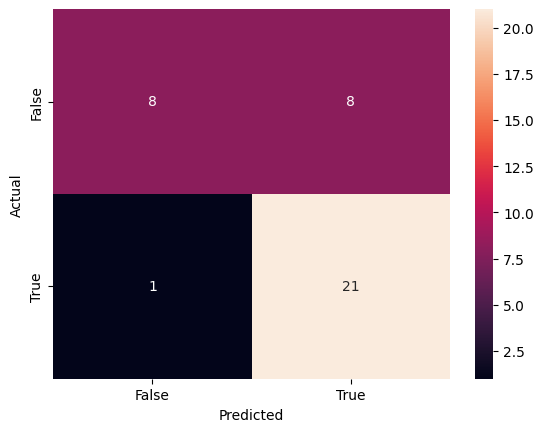

In [ ]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

###Tampilkan Akurasi

In [23]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.7631578947368421


###Tampilkan data training dan data prediksi

In [ ]:
print (X_test) #test dataset
print (Y_pred) #predicted values

[[ 3.98196608e+00 -2.34704546e-01  1.02063841e+00 -2.07385269e-01
   1.02902544e+00 -2.23858782e-01 -4.02736984e-01 -6.68446506e-01]
 [ 6.28521316e+00 -2.42506836e-01  1.51430350e+00 -2.08146683e-01
   1.52604863e+00 -2.26183134e-01 -4.02736984e-01 -6.68446506e-01]
 [ 9.81683707e-01 -1.80061527e-01  4.34620233e-01  5.77550444e-01
   4.33519081e-01 -2.23858782e-01 -4.02736984e-01  1.50545778e+00]
 [-4.48753951e-01  4.08345456e-02 -2.02111856e-01 -2.19478315e-01
  -2.01944344e-01 -2.26183134e-01 -4.02736984e-01 -6.68446506e-01]
 [ 5.33156645e-01 -2.29264176e-01 -3.11136225e-03 -2.19478315e-01
  -1.59232733e-03 -2.23858782e-01 -4.02736984e-01 -6.68446506e-01]
 [-5.21488069e-01  1.73303482e-01 -2.79600807e-01 -1.39738861e-01
  -2.80519129e-01 -4.43897504e-01 -4.02736984e-01  1.50545778e+00]
 [-5.21488069e-01 -9.98683104e-02 -3.24138813e-01 -1.84468201e-01
  -3.25045734e-01 -3.81139981e-01 -4.02736984e-01  1.50545778e+00]
 [-5.09365716e-01 -1.92060245e-01 -3.33504281e-01 -2.19478315e-01
  -

##Evaluasi Model Pembelajaran

Pra proses data ulang - Hilangkan variabel yang tidak terlalu berpengaruh

In [30]:
df = df.drop('acqBusinessType', axis=1)
df

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,1,True
1,15,60666.666667,910000,6370.00,903630.00,197,3,False
2,15,55080.600000,826209,5783.46,820425.54,7204,3,False
3,302,18854.304636,5694000,315.00,5693685.00,394,1,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,3,True
...,...,...,...,...,...,...,...,...
182,9,21744.444444,195700,0.00,195700.00,198,1,False
183,218,29218.660550,6369668,1170.00,6368498.00,391,1,True
184,41,46292.682927,1898000,13286.00,1884714.00,394,3,False
185,9,36211.111111,325900,0.00,325900.00,395,1,False


Memisahkan dataset

In [31]:
X = df.drop(columns = 'eligible', axis = 1)
Y = df.eligible

print(X,Y)

     freqTrx   avgAmountTrx  totalAmountTrx  totalMdrAmountTrx  \
0        124   22653.225806         2809000            1164.00   
1         15   60666.666667          910000            6370.00   
2         15   55080.600000          826209            5783.46   
3        302   18854.304636         5694000             315.00   
4       1216   21218.338816        25801500          180610.50   
..       ...            ...             ...                ...   
182        9   21744.444444          195700               0.00   
183      218   29218.660550         6369668            1170.00   
184       41   46292.682927         1898000           13286.00   
185        9   36211.111111          325900               0.00   
186        8  161250.000000         1290000            2640.00   

     totalBusinessReceive  acqBusinessCity  acqBusinessCriteria  
0              2807836.00              395                    1  
1               903630.00              197                    3  
2        

Standarisasi data

In [32]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)
X = Standard_data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(187, 7) (149, 7) (38, 7)


Implementasi ulang model

<Axes: xlabel='Predicted', ylabel='Actual'>

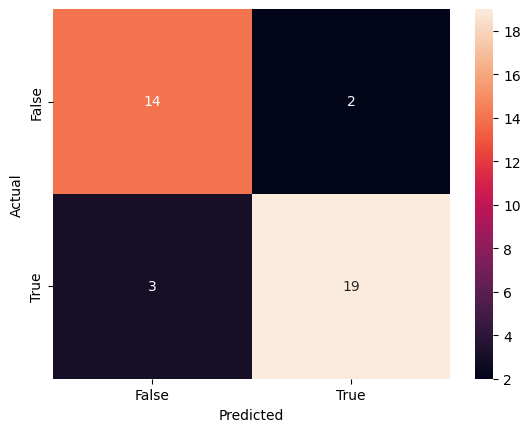

In [33]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train, Y_train)
Y_pred = modelnb.predict(X_test)
Y_pred
nbtrain.predict_proba(X_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Akurasi

In [34]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

Accuracy:  0.868421052631579


#===

#===

# K-Nearest Neighbor

##Import Module

In [35]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

##Read File Data

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/merchant.csv')
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessName,acqBusinessCity,acqBusinessProvince,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,Ayam Geprek Papiluk,Wil. Jakarta Timur,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
1,15,60666.666667,910000,6370.00,903630.00,Aldien Kitchen,Depok,Jawa Barat,FOOD AND DRINK,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,Apotek Indobat Ground Zero,Badung,Bali,HEALTH AND BEAUTY,UKE,False
3,302,18854.304636,5694000,315.00,5693685.00,Kedai Pelangi Ibu Santi,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
4,1216,21218.338816,25801500,180610.50,25620889.50,Warung Makan Mahardika,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   freqTrx               187 non-null    int64  
 1   avgAmountTrx          187 non-null    float64
 2   totalAmountTrx        187 non-null    int64  
 3   totalMdrAmountTrx     187 non-null    float64
 4   totalBusinessReceive  187 non-null    float64
 5   acqBusinessName       187 non-null    object 
 6   acqBusinessCity       187 non-null    object 
 7   acqBusinessProvince   187 non-null    object 
 8   acqBusinessType       187 non-null    object 
 9   acqBusinessCriteria   187 non-null    object 
 10  eligible              187 non-null    bool   
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 14.9+ KB


In [38]:
df.shape

(187, 11)

##Proses

###Cek Data

Periksa merchant yang direkomendasikan untuk dapat mengambil pinjaman

In [39]:
df[df.eligible == True]

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessName,acqBusinessCity,acqBusinessProvince,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.0,2807836.0,Ayam Geprek Papiluk,Wil. Jakarta Timur,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
3,302,18854.304636,5694000,315.0,5693685.0,Kedai Pelangi Ibu Santi,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
4,1216,21218.338816,25801500,180610.5,25620889.5,Warung Makan Mahardika,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,True
5,33,101131.484848,3337339,9688.0,3327651.0,Toko DD plastik II,Wil. Jakarta Pusat,Daerah Khusus Ibukota Jakarta,REQUIREMENT,UMI,True
6,55,30218.181818,1662000,600.0,1661400.0,Juice dan Aneka Minuman Pak Harto,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
...,...,...,...,...,...,...,...,...,...,...,...
173,19,79350.052632,1507651,0.0,1507651.0,Market Hidekarta,Wil. Jakarta Pusat,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
176,40,45833.225000,1833329,2790.0,1830539.0,Warteg Lina,Wil. Jakarta Timur,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
177,54,20166.666667,1089000,366.0,1088634.0,Warmindo Chandra,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True
183,218,29218.660550,6369668,1170.0,6368498.0,Soto Ayam Khas Madura,Wil. Jakarta Pusat,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,True


Periksa merchant yang tidak direkomendasikan untuk dapat mengambil pinjaman

In [40]:

df[df.eligible == False]

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessName,acqBusinessCity,acqBusinessProvince,acqBusinessType,acqBusinessCriteria,eligible
1,15,60666.666667,910000,6370.00,903630.00,Aldien Kitchen,Depok,Jawa Barat,FOOD AND DRINK,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,Apotek Indobat Ground Zero,Badung,Bali,HEALTH AND BEAUTY,UKE,False
7,73,35712.328767,2607000,18249.00,2588751.00,soto ambengan cak taji,Wil. Jakarta Utara,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,False
9,7,18857.142857,132000,924.00,131076.00,Warung Aurellia Rufata Pancoran,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,False
14,7,10000.000000,70000,0.00,70000.00,cafe star black,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,False
...,...,...,...,...,...,...,...,...,...,...,...
180,4,61000.000000,244000,0.00,244000.00,Warung Nasi Ayu,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UMI,False
181,18,15944.444444,287000,0.00,287000.00,Ketupat Sayur Padang Japang,Tangerang Selatan,Banten,FOOD AND DRINK,UMI,False
182,9,21744.444444,195700,0.00,195700.00,Raytumb Design,Bekasi,Jawa Barat,REQUIREMENT,UMI,False
184,41,46292.682927,1898000,13286.00,1884714.00,Dsabda Cafe Kantin Rufata,Wil. Jakarta Selatan,Daerah Khusus Ibukota Jakarta,FOOD AND DRINK,UKE,False


###Seleksi Data

Hilangkan variabel acqBusinessProvince karena sudah di wakilkan acqBusinessCity untuk parameter tempat

In [41]:
df = df.drop('acqBusinessProvince', axis=1)


Hilangkan variabel acqBusinessName karena tidak mempengaruhi penghitungan

In [42]:
df = df.drop('acqBusinessName', axis=1)


###Mapping Data

Mapping data acqBusinessCity, acqBusinessType, acqBusinessCriteria menjadi number supaya bisa diolah model mesin pembelajaran

Penyiapan dataset pemetaan untuk variabel acqBusinessCity

In [43]:
url = 'https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/dataset_pemetaa_abc.json'
placeData = []
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())
    placeData = data

for place in placeData:
    place['code'] = int(place['code'])
    if place['location'].startswith("Kab. "):
        place['location'] = place['location'][5:]
    elif place['location'].startswith("Kota "):
        place['location'] = place['location'][5:]
    elif place['location'].startswith("Wil. Kota "):
        place['location'] = "Wil. " + place['location'][10:]
dfPlaceData = pd.DataFrame(placeData)

# Print the DataFrame
dfPlaceData.head()

,code,location,provinceCode,province
0,102,Bekasi,9,Jawa Barat
1,103,Purwakarta,9,Jawa Barat
2,106,Karawang,9,Jawa Barat
3,108,Bogor,9,Jawa Barat
4,109,Sukabumi,9,Jawa Barat


Proses perubahan nilai asli acqBusinessCity menjadi nilai referensi yang bertipe data number

In [44]:
location_to_code = {data['location']: data['code'] for data in placeData}
df['acqBusinessCity'] = df['acqBusinessCity'].map(location_to_code).fillna(df['acqBusinessCity'])
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,FOOD AND DRINK,UMI,True
1,15,60666.666667,910000,6370.00,903630.00,197,FOOD AND DRINK,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,7204,HEALTH AND BEAUTY,UKE,False
3,302,18854.304636,5694000,315.00,5693685.00,394,FOOD AND DRINK,UMI,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,FOOD AND DRINK,UKE,True


Penyiapan dataset pemetaan untuk variabel acqBusinessCity

In [45]:
url = 'https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/data_pemetaa_bt.json'
businessType = []
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())
    businessType = data

dfBusinessType = pd.DataFrame(businessType)

# Print the DataFrame
dfBusinessType.head()

,id,type
0,1,FOOD AND DRINK
1,2,CLOTHING AND ACCESSORIES
2,3,HEALTH AND BEAUTY
3,4,RAW MATERIAL PRODUCT
4,5,AUTOMOTIVE


Proses perubahan nilai asli acqBusinessType menjadi nilai referensi yang bertipe data number

In [46]:
type_to_id = {data['type']: data['id'] for data in businessType}
df['acqBusinessType'] = df['acqBusinessType'].map(type_to_id).fillna(df['acqBusinessType'])
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,1,UMI,True
1,15,60666.666667,910000,6370.00,903630.00,197,1,UKE,False
2,15,55080.600000,826209,5783.46,820425.54,7204,3,UKE,False
3,302,18854.304636,5694000,315.00,5693685.00,394,1,UMI,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,1,UKE,True


In [47]:
url = 'https://raw.githubusercontent.com/irvandandung/penelitian-rekomendasi-pinjaman-merchant/master/dataset_pemetaa_bc.json'
businessCriteria = []
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())
    businessCriteria = data

dfBusinessCriteria = pd.DataFrame(businessCriteria)

# Print the DataFrame
dfBusinessCriteria.head()

,id,criteria
0,1,UMI
1,2,UME
2,3,UKE
3,4,URE
4,5,UBE


Proses perubahan nilai asli acqBusinessCriteria menjadi nilai referensi yang bertipe data number

In [48]:
criteria_to_id = {data['criteria']: data['id'] for data in businessCriteria}
df['acqBusinessCriteria'] = df['acqBusinessCriteria'].map(criteria_to_id).fillna(df['acqBusinessCriteria'])
df.head()

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessType,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,1,1,True
1,15,60666.666667,910000,6370.00,903630.00,197,1,3,False
2,15,55080.600000,826209,5783.46,820425.54,7204,3,3,False
3,302,18854.304636,5694000,315.00,5693685.00,394,1,1,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,1,3,True


###Memisahkan dataset

In [49]:
X = df.drop(columns = 'eligible', axis = 1)
Y = df.eligible

print(X,Y)

     freqTrx   avgAmountTrx  totalAmountTrx  totalMdrAmountTrx  \
0        124   22653.225806         2809000            1164.00   
1         15   60666.666667          910000            6370.00   
2         15   55080.600000          826209            5783.46   
3        302   18854.304636         5694000             315.00   
4       1216   21218.338816        25801500          180610.50   
..       ...            ...             ...                ...   
182        9   21744.444444          195700               0.00   
183      218   29218.660550         6369668            1170.00   
184       41   46292.682927         1898000           13286.00   
185        9   36211.111111          325900               0.00   
186        8  161250.000000         1290000            2640.00   

     totalBusinessReceive  acqBusinessCity  acqBusinessType  \
0              2807836.00              395                1   
1               903630.00              197                1   
2               82

###Standarisasi Data

In [50]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)

In [51]:
X = Standard_data
print(X)
print(Y)

[[ 0.18766958 -0.21247344 -0.06669249 ... -0.223084   -0.40273698
  -0.66844651]
 [-0.47299866 -0.04263839 -0.26430387 ... -0.37649128 -0.40273698
   1.50545778]
 [-0.47299866 -0.06759562 -0.27302323 ...  5.05242185 -0.02990621
   1.50545778]
 ...
 [-0.31540807 -0.10685795 -0.16149184 ... -0.22385878 -0.40273698
   1.50545778]
 [-0.50936572 -0.15190002 -0.32508577 ... -0.223084   -0.2163216
  -0.66844651]
 [-0.51542689  0.4067441  -0.22476079 ... -0.22385878 -0.02990621
  -0.66844651]]
0       True
1      False
2      False
3       True
4       True
       ...  
182    False
183     True
184    False
185    False
186     True
Name: eligible, Length: 187, dtype: bool


Train-Test-Split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(187, 8) (149, 8) (38, 8)


##Implementasi Model Mesin Pembelajaran

###Deklarasi model

In [54]:
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k

### Training Model

In [55]:
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

###Menggunakan Confusion Matrix untuk melihat hasil

<Axes: xlabel='Predicted', ylabel='Actual'>

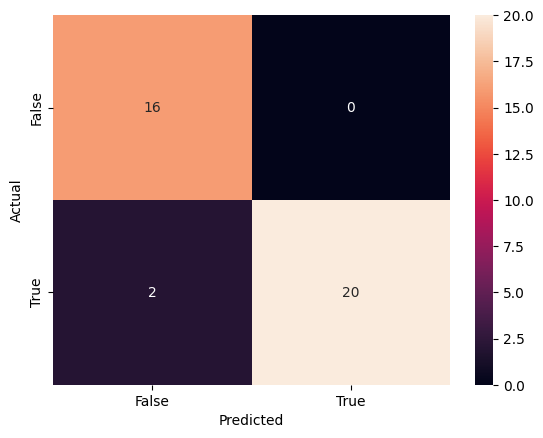

In [56]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

###Tampilkan Akurasi

In [58]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9473684210526315


###Tampilkan data training dan prediksi

In [ ]:
print (X_test) #test dataset
print (Y_pred) #predicted values

[[ 3.98196608e+00 -2.34704546e-01  1.02063841e+00 -2.07385269e-01
   1.02902544e+00 -2.23858782e-01 -4.02736984e-01 -6.68446506e-01]
 [ 6.28521316e+00 -2.42506836e-01  1.51430350e+00 -2.08146683e-01
   1.52604863e+00 -2.26183134e-01 -4.02736984e-01 -6.68446506e-01]
 [ 9.81683707e-01 -1.80061527e-01  4.34620233e-01  5.77550444e-01
   4.33519081e-01 -2.23858782e-01 -4.02736984e-01  1.50545778e+00]
 [-4.48753951e-01  4.08345456e-02 -2.02111856e-01 -2.19478315e-01
  -2.01944344e-01 -2.26183134e-01 -4.02736984e-01 -6.68446506e-01]
 [ 5.33156645e-01 -2.29264176e-01 -3.11136225e-03 -2.19478315e-01
  -1.59232733e-03 -2.23858782e-01 -4.02736984e-01 -6.68446506e-01]
 [-5.21488069e-01  1.73303482e-01 -2.79600807e-01 -1.39738861e-01
  -2.80519129e-01 -4.43897504e-01 -4.02736984e-01  1.50545778e+00]
 [-5.21488069e-01 -9.98683104e-02 -3.24138813e-01 -1.84468201e-01
  -3.25045734e-01 -3.81139981e-01 -4.02736984e-01  1.50545778e+00]
 [-5.09365716e-01 -1.92060245e-01 -3.33504281e-01 -2.19478315e-01
  -

##Evaluasi Model Pembelajaran K-NN

Pra proses data ulang - Hilangkan variabel yang tidak terlalu berpengaruh

In [59]:
df = df.drop('acqBusinessType', axis=1)
df

,freqTrx,avgAmountTrx,totalAmountTrx,totalMdrAmountTrx,totalBusinessReceive,acqBusinessCity,acqBusinessCriteria,eligible
0,124,22653.225806,2809000,1164.00,2807836.00,395,1,True
1,15,60666.666667,910000,6370.00,903630.00,197,3,False
2,15,55080.600000,826209,5783.46,820425.54,7204,3,False
3,302,18854.304636,5694000,315.00,5693685.00,394,1,True
4,1216,21218.338816,25801500,180610.50,25620889.50,394,3,True
...,...,...,...,...,...,...,...,...
182,9,21744.444444,195700,0.00,195700.00,198,1,False
183,218,29218.660550,6369668,1170.00,6368498.00,391,1,True
184,41,46292.682927,1898000,13286.00,1884714.00,394,3,False
185,9,36211.111111,325900,0.00,325900.00,395,1,False


Memisahkan data set

In [60]:
X = df.drop(columns = 'eligible', axis = 1)
Y = df.eligible

print(X,Y)

     freqTrx   avgAmountTrx  totalAmountTrx  totalMdrAmountTrx  \
0        124   22653.225806         2809000            1164.00   
1         15   60666.666667          910000            6370.00   
2         15   55080.600000          826209            5783.46   
3        302   18854.304636         5694000             315.00   
4       1216   21218.338816        25801500          180610.50   
..       ...            ...             ...                ...   
182        9   21744.444444          195700               0.00   
183      218   29218.660550         6369668            1170.00   
184       41   46292.682927         1898000           13286.00   
185        9   36211.111111          325900               0.00   
186        8  161250.000000         1290000            2640.00   

     totalBusinessReceive  acqBusinessCity  acqBusinessCriteria  
0              2807836.00              395                    1  
1               903630.00              197                    3  
2        

Standarisasi Data

In [61]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)
X = Standard_data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 3)
print(X.shape, X_train.shape, X_test.shape)

(187, 7) (149, 7) (38, 7)


Implementasi Ulang Model

<Axes: xlabel='Predicted', ylabel='Actual'>

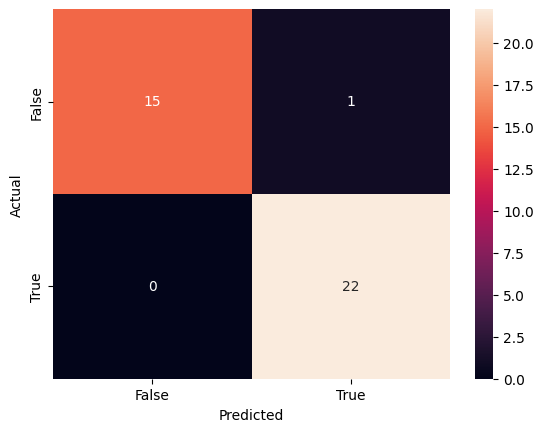

In [62]:
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Tampilkan Akurasi

In [63]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9736842105263158
